In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Internship0/indian_food.csv")
display(df)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
print(df.head())

             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None


In [ ]:
print(df.describe())

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [ ]:
print(df.nunique())

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64


In [ ]:
print(df.isnull().sum())

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64


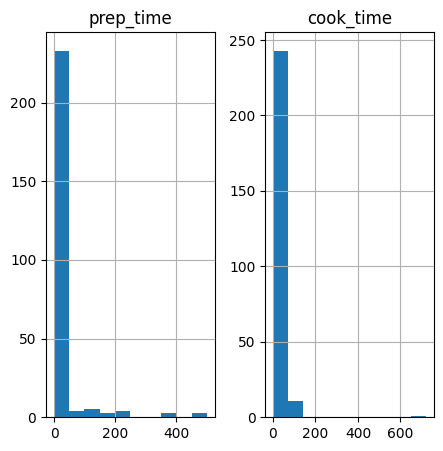

In [ ]:
df.hist(bins=10, figsize=(5,5))
plt.show()

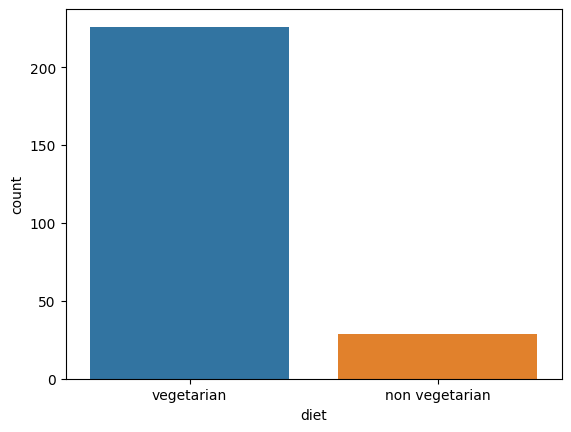

In [ ]:
sns.countplot(x='diet', data=df)
plt.show()

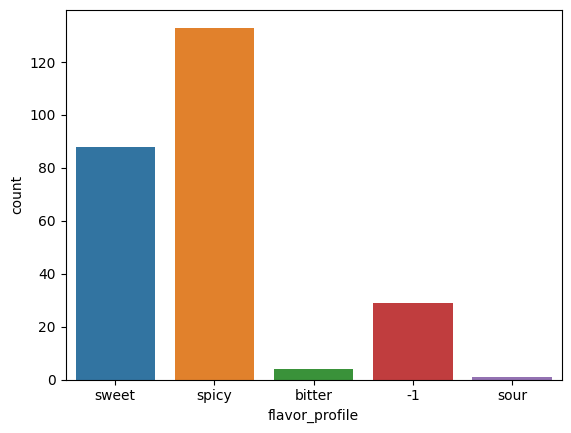

In [ ]:
sns.countplot(x='flavor_profile', data=df)
plt.show()

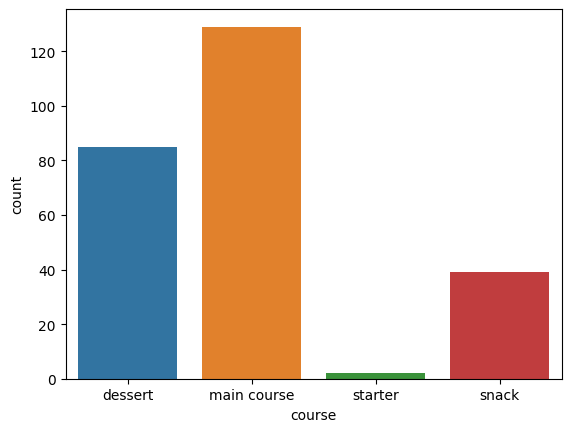

In [ ]:
sns.countplot(x='course', data=df)
plt.show()

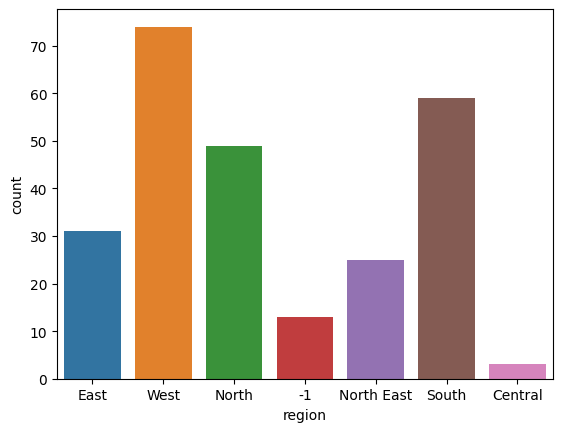

In [ ]:
sns.countplot(x='region', data=df)
plt.show()

<ipython-input-14-b874e109f562>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


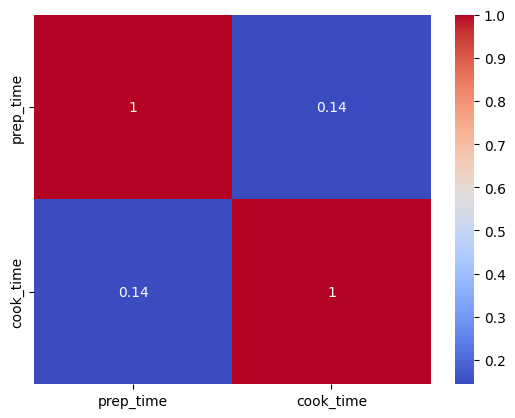

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
def get_time():
  currentTime = datetime.datetime.now()
  currentTime.hour
  if currentTime.hour < 12:
      print('Good morning.')
  elif 12 <= currentTime.hour < 18:
      print('Good afternoon.')
  else:
      print('Good evening.')

In [ ]:
def model(desired_ingredients,allergies,diett):
  df = pd.read_csv("/content/drive/MyDrive/Internship0/indian_food.csv")
  df = df[df['ingredients'].apply(lambda x: all([ingredient in x for ingredient in desired_ingredients]))]
  df = df[df['ingredients'].apply(lambda x: not any([allergy in x for allergy in allergies]))]
  df = df[df['diet'].apply(lambda x: all([diett in x for diett in diett]))]
  cv = CountVectorizer()
  ingredient_matrix = cv.fit_transform(df['ingredients'])
  cosine_sim = cosine_similarity(ingredient_matrix)
  indices = pd.Series(df.index)
  top_indices = indices[cosine_sim[0].argsort()[::-1][1:6]]
  print('\nTop recommended dishes:\n')
  for index in top_indices:
      print('- ' + df.loc[index]['name'])

In [ ]:
def run_chatbot():
  get_time()
  print("Hello!\nWelcome to the personalized menu recommendation chatbot!\nYou can ask me to recommend a menu item based on your preferences.\n")
  while(True):
    print("\nPlease enter a number based on your choice")
    print("\n1. If you want a customized recommendation\n2. If you want a meal to be suggested\n3. Exit")
    ch=input("\nPlease Enter your choice: ")
    if ch=='1':
      print("\nDo you have any ingredients you wish your meal to include? (y/n)")
      choice=input()
      if choice=='y':
        desired_ingredients_str = input('Enter desired ingredients (comma-separated): ')
        desired_ingredients = [ingredient.strip() for ingredient in desired_ingredients_str.split(',')]
        print(desired_ingredients)    
      print("\nDo you have any ingredients you wish to avoid/allergic to? (y/n)")
      choice=input()
      if choice=='y':  
          allergies = input('Enter undesired ingredients (comma-separated): ')    
          allergies=['gluten']
          print(allergies)
      print("\nDo you have any preferred diet? (y/n)")
      choice=input()
      diet='vegeterian'
      if choice=='y':
        diet=input("Enter your diet: ")
      model(desired_ingredients,allergies,diet)
    elif ch=='2':
      pass
    elif ch=='3':
      print("\nEnd")
      break
    else:
      print("\nInvalid Choice..Please re-enter input\n")
      continue

In [ ]:
run_chatbot()

Good evening.
Hello!
Welcome to the personalized menu recommendation chatbot!
You can ask me to recommend a menu item based on your preferences.


Please enter a number based on your choice

1. If you want a customized recommendation
2. If you want a meal to be suggested
3. Exit

Please Enter your choice: 1

Do you have any ingredients you wish your meal to include? (y/n)
y
Enter desired ingredients (comma-separated): sugar,ghee
['sugar', 'ghee']

Do you have any ingredients you wish to avoid/allergic to? (y/n)
y
Enter undesired ingredients (comma-separated): gluten
['gluten']

Do you have any preferred diet? (y/n)
n

Top recommended dishes:

- Laddu
- Sohan papdi
- Pantua
- Mihidana
- Pootharekulu

Please enter a number based on your choice

1. If you want a customized recommendation
2. If you want a meal to be suggested
3. Exit

Please Enter your choice: 3

End
